# ДЗ 2. Keras

Используя файл Web2.ipynb (он в полезных ссылках):  

Возьмите набор примеров fashion-MNIST  

1. Опишите - какой результат нейросети получен в зависимости от:  
    a. числа нейронов в слое (для 2-х слойной сети),  
    b. числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).  
    c. фиксируйте для тренировочного и тестового набора метрики accuracy.  

2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.  

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?  

4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.models import load_model

import tensorflow as tf

In [2]:
# Загружаем набор примеров fashion-MNIST
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()
print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


Label is 3


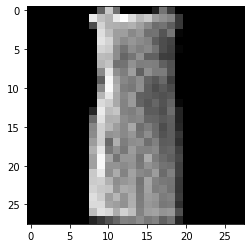

In [3]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind], cmap='gray')
print(f'Label is {y_train_labels[ind]}')

In [4]:
X_train.min(), X_train.max()

(0, 255)

In [5]:
# Нормировка
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [6]:
# Вытягивание признаков
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [7]:
# Передача данных для обучения нейросети
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Результат нейросети

Опишите - какой результат нейросети получен в зависимости от:  
a. числа нейронов в слое (для 2-х слойной сети),  
b. числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).  
c. фиксируйте для тренировочного и тестового набора метрики accuracy.  

**Двухслойная модель**

In [8]:
model = Sequential()
model.add(Dense(64, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=1, 
                    validation_split=0.2)

Epoch 1/5
4800/4800 [==============================] - 2s 479us/step - loss: 0.8259 - accuracy: 0.7312 - val_loss: 0.5276 - val_accuracy: 0.8213
Epoch 2/5
4800/4800 [==============================] - 2s 433us/step - loss: 0.4829 - accuracy: 0.8317 - val_loss: 0.4501 - val_accuracy: 0.8432
Epoch 3/5
4800/4800 [==============================] - 2s 438us/step - loss: 0.4385 - accuracy: 0.8468 - val_loss: 0.4274 - val_accuracy: 0.8498
Epoch 4/5
4800/4800 [==============================] - 2s 442us/step - loss: 0.4053 - accuracy: 0.8573 - val_loss: 0.4255 - val_accuracy: 0.8525
Epoch 5/5
4800/4800 [==============================] - 2s 442us/step - loss: 0.3953 - accuracy: 0.8625 - val_loss: 0.4162 - val_accuracy: 0.8550


In [11]:
loss, metric = model.evaluate(X_test, y_test, batch_size=128)
loss, metric

79/79 [==============================] - 0s 632us/step - loss: 0.4345 - accuracy: 0.8431


(0.4345167577266693, 0.8431000113487244)

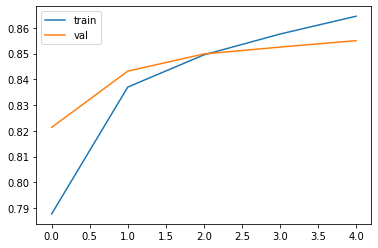

In [12]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend();

**Трехслойная модель**

In [13]:
model = Sequential()
model.add(Dense(64, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=1, 
                    validation_split=0.2)

Epoch 1/5
4800/4800 [==============================] - 2s 474us/step - loss: 0.8708 - accuracy: 0.7034 - val_loss: 0.4797 - val_accuracy: 0.8321
Epoch 2/5
4800/4800 [==============================] - 2s 442us/step - loss: 0.4608 - accuracy: 0.8371 - val_loss: 0.4291 - val_accuracy: 0.8523
Epoch 3/5
4800/4800 [==============================] - 2s 442us/step - loss: 0.4051 - accuracy: 0.8576 - val_loss: 0.4089 - val_accuracy: 0.8567
Epoch 4/5
4800/4800 [==============================] - 2s 444us/step - loss: 0.3868 - accuracy: 0.8619 - val_loss: 0.4243 - val_accuracy: 0.8504
Epoch 5/5
4800/4800 [==============================] - 2s 447us/step - loss: 0.3521 - accuracy: 0.8732 - val_loss: 0.3871 - val_accuracy: 0.8612


In [16]:
loss, metric = model.evaluate(X_test, y_test, batch_size=128)
loss, metric

79/79 [==============================] - 0s 678us/step - loss: 0.4072 - accuracy: 0.8513


(0.4072488248348236, 0.8513000011444092)

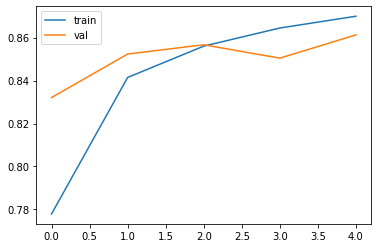

In [17]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend();

**Пятислойная модель**

In [18]:
model = Sequential()
model.add(Dense(64, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 54,762
Trainable params: 54,762
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=1, 
                    validation_split=0.2)

Epoch 1/5
4800/4800 [==============================] - 3s 490us/step - loss: 1.0674 - accuracy: 0.6326 - val_loss: 0.4772 - val_accuracy: 0.8329
Epoch 2/5
4800/4800 [==============================] - 2s 474us/step - loss: 0.4762 - accuracy: 0.8272 - val_loss: 0.4294 - val_accuracy: 0.8456
Epoch 3/5
4800/4800 [==============================] - 2s 467us/step - loss: 0.4117 - accuracy: 0.8514 - val_loss: 0.3832 - val_accuracy: 0.8607
Epoch 4/5
4800/4800 [==============================] - 2s 469us/step - loss: 0.3820 - accuracy: 0.8602 - val_loss: 0.3836 - val_accuracy: 0.8619
Epoch 5/5
4800/4800 [==============================] - 2s 463us/step - loss: 0.3576 - accuracy: 0.8698 - val_loss: 0.3580 - val_accuracy: 0.8684


In [21]:
loss, metric = model.evaluate(X_test, y_test, batch_size=128)
loss, metric

79/79 [==============================] - 0s 665us/step - loss: 0.3896 - accuracy: 0.8614


(0.38956815004348755, 0.8614000082015991)

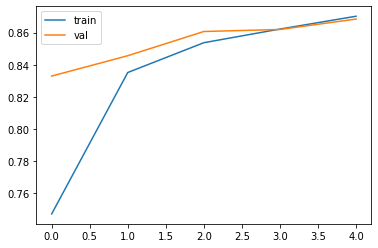

In [22]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend();

**Десятислойная модель**

In [23]:
model = Sequential()
model.add(Dense(64, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_16 (Dense)             (None, 32)               

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=1, 
                    validation_split=0.2)

Epoch 1/5
4800/4800 [==============================] - 3s 549us/step - loss: 1.4419 - accuracy: 0.4804 - val_loss: 0.5949 - val_accuracy: 0.7912
Epoch 2/5
4800/4800 [==============================] - 2s 519us/step - loss: 0.5084 - accuracy: 0.8167 - val_loss: 0.4501 - val_accuracy: 0.8398
Epoch 3/5
4800/4800 [==============================] - 2s 521us/step - loss: 0.4343 - accuracy: 0.8437 - val_loss: 0.4392 - val_accuracy: 0.8417
Epoch 4/5
4800/4800 [==============================] - 2s 518us/step - loss: 0.4142 - accuracy: 0.8531 - val_loss: 0.3768 - val_accuracy: 0.8668
Epoch 5/5
4800/4800 [==============================] - 2s 515us/step - loss: 0.3741 - accuracy: 0.8641 - val_loss: 0.3910 - val_accuracy: 0.8588


In [26]:
loss, metric = model.evaluate(X_test, y_test, batch_size=128)
loss, metric

79/79 [==============================] - 0s 712us/step - loss: 0.4258 - accuracy: 0.8472


(0.4257580041885376, 0.8471999764442444)

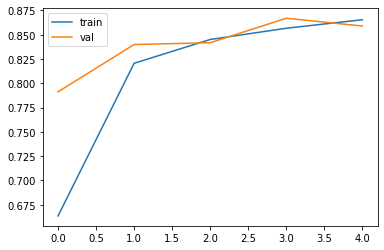

In [27]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend();

**Выводы**  
- Увеличение количества нейронов в сети улучшает качество лишь до определенного момента  
- Оптимальный результат показала пятислойная модель  

## Оптимизаторы SGD, Adam, RMSProp

Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

Epoch 1/5
1875/1875 [==============================] - 1s 576us/step - loss: 0.9258 - accuracy: 0.6700 - val_loss: 0.5892 - val_accuracy: 0.7826
Epoch 2/5
1875/1875 [==============================] - 1s 550us/step - loss: 0.5218 - accuracy: 0.8149 - val_loss: 0.5164 - val_accuracy: 0.8093
Epoch 3/5
1875/1875 [==============================] - 1s 553us/step - loss: 0.4650 - accuracy: 0.8376 - val_loss: 0.4707 - val_accuracy: 0.8336
Epoch 4/5
1875/1875 [==============================] - 1s 555us/step - loss: 0.4302 - accuracy: 0.8482 - val_loss: 0.4556 - val_accuracy: 0.8367
Epoch 5/5
1875/1875 [==============================] - 1s 552us/step - loss: 0.4061 - accuracy: 0.8558 - val_loss: 0.4388 - val_accuracy: 0.8466
Epoch 1/5
1875/1875 [==============================] - 2s 643us/step - loss: 0.5574 - accuracy: 0.7998 - val_loss: 0.5042 - val_accuracy: 0.8212
Epoch 2/5
1875/1875 [==============================] - 1s 620us/step - loss: 0.3992 - accuracy: 0.8559 - val_loss: 0.4103 - val_ac

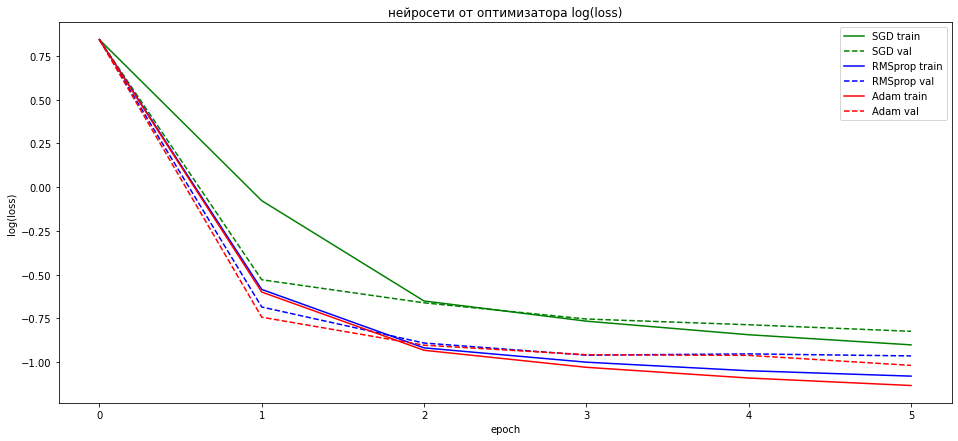

Wall time: 21.3 s


In [29]:
%%time

# создаем модель model
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='sigmoid'),
])

# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model_weights.h5')

# будем сохранять модели в словарь
models = {}


plt.figure(figsize=(16, 7))
colors = ['g', 'b', 'r', 'y']

num_epochs = 5
batch_size = 32

# вектор для вывода результатов
epoch = np.arange(num_epochs+1)

# будем изменять оптимизаторы
for i, i_optim in enumerate([keras.optimizers.SGD(),
                             keras.optimizers.RMSprop(),
                             keras.optimizers.Adam()]):
    
    # создаем рабочую модель  model_i, куда будем загружать эти веса (она должна быть идентичной структуры)
    model_i = Sequential([
        Dense(64, activation='relu', input_shape=(784,)),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='sigmoid'),
    ])
    
    # загружаем веса model_i.load_weights('model.h5')
    model_i.load_weights('model_weights.h5')
    
    # компилируем model_i с одним из оптимизаторов
    model_i.compile(
        optimizer=i_optim,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )
    
    # вычисляем ошибку для modeli без обучения
    h0_train = model_i.evaluate(X_train, y_train, verbose=0)
    h0_val = model_i.evaluate(X_test, y_test, verbose=0)

    # проводим обучение модели 
    h = model_i.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose=1)
    
    # записываем обученную модель в словарь
    models[i_optim.get_config()['name']] = model_i

    # картинки
    plt.plot(epoch, np.log([h0_train[0]] + h.history['loss']),
             '-', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' train')
    plt.plot(epoch, np.log([h0_val[0]] + h.history['val_loss']),
             '--', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' val')

plt.legend()
plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

**Вывод:** наилучшее качество для выбранной пятислойной модели дает применение оптимизатора Adam

## Вывод. Качество классификации

Лучшее качество классификации мы смогли получить на патислойной модели с использованием оптимизатора:  
- 5-ти слойная модель - accuracy: 0.86  
- Оптимизатор: Adam

## Матрица ошибок

Не разобрался как тут сделать...